In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split


In [10]:
# Read in data
player_data_df = pd.read_csv('./combined_draft_class_with_ws_FINAL.csv')
target_col = 'WS'

# Separate target column from parameter data
X = player_data_df.drop(columns=[target_col])
y = player_data_df[target_col]

# Drop columns that are not needed
X = X.drop(columns=['Player','TS%', 'eFG%', 'Season', 'Draft Year'])

X['3P%'] = X['3P%'].fillna(0)

# One-hot encode categorical features
# X = pd.get_dummies(X, dtype=int)
quantile_90 = y.quantile(0.9)
quantile_65 = y.quantile(0.65)
quantile_30 = y.quantile(0.3)

def ws_to_grade(ws):
    if ws >= quantile_90:
        return 0  # A
    elif ws >= quantile_65:
        return 1  # B
    elif ws >= quantile_30:
        return 2  # C
    else:
        return 3  # D

y_class = y.apply(ws_to_grade)

X_train_and_val, X_test, y_train_and_val, y_test = train_test_split(
    X, y_class, test_size=0.1, random_state=42, stratify=y_class
)
X_train, X_val, y_train, y_val = train_test_split(
    X_train_and_val, y_train_and_val, test_size=2/9, random_state=42, stratify=y_train_and_val
)


Statistical Summary of Features:


,PTS,Round,Pick,International Flag,G,GS,MP,FG,FGA,2P,...,TRB,AST,STL,BLK,TOV,PF,FG%,2P%,3P%,FT%
count,657.000000,657.000000,657.000000,657.000000,657.000000,657.000000,657.000000,657.000000,657.000000,657.000000,...,657.000000,657.000000,657.000000,657.000000,657.000000,657.000000,657.000000,657.000000,657.000000,657.000000
mean,503.141553,1.412481,15.792998,0.050228,32.724505,30.438356,1008.307763,177.414003,364.124810,138.223744,...,202.479452,82.841705,36.998478,30.036530,70.643836,73.350076,0.493368,0.532568,0.312619,0.737251
std,165.642917,0.492656,9.937138,0.218582,5.834498,8.575681,244.552107,56.653759,119.816881,52.763048,...,88.917627,58.622780,18.638367,28.222524,25.225104,19.798662,0.067261,0.062711,0.172441,0.094938
min,30.000000,1.000000,1.000000,0.000000,3.000000,0.000000,53.000000,10.000000,26.000000,7.000000,...,17.000000,1.000000,1.000000,0.000000,3.000000,5.000000,0.333000,0.350000,-1.000000,0.295000
25%,416.000000,1.000000,8.000000,0.000000,31.000000,30.000000,903.000000,144.000000,297.000000,101.000000,...,135.000000,40.000000,23.000000,10.000000,54.000000,60.000000,0.447000,0.494000,0.291000,0.687000
50%,509.000000,1.000000,15.000000,0.000000,34.000000,33.000000,1068.000000,182.000000,372.000000,136.000000,...,190.000000,68.000000,34.000000,21.000000,69.000000,74.000000,0.479000,0.527000,0.356000,0.753000
75%,613.000000,2.000000,23.000000,0.000000,36.000000,35.000000,1168.000000,214.000000,442.000000,174.000000,...,266.000000,108.000000,47.000000,43.000000,85.000000,87.000000,0.531000,0.568000,0.400000,0.807000
max,1068.000000,2.000000,58.000000,1.000000,41.000000,41.000000,1543.000000,346.000000,765.000000,311.000000,...,508.000000,351.000000,126.000000,186.000000,170.000000,138.000000,0.769000,0.800000,1.000000,0.935000


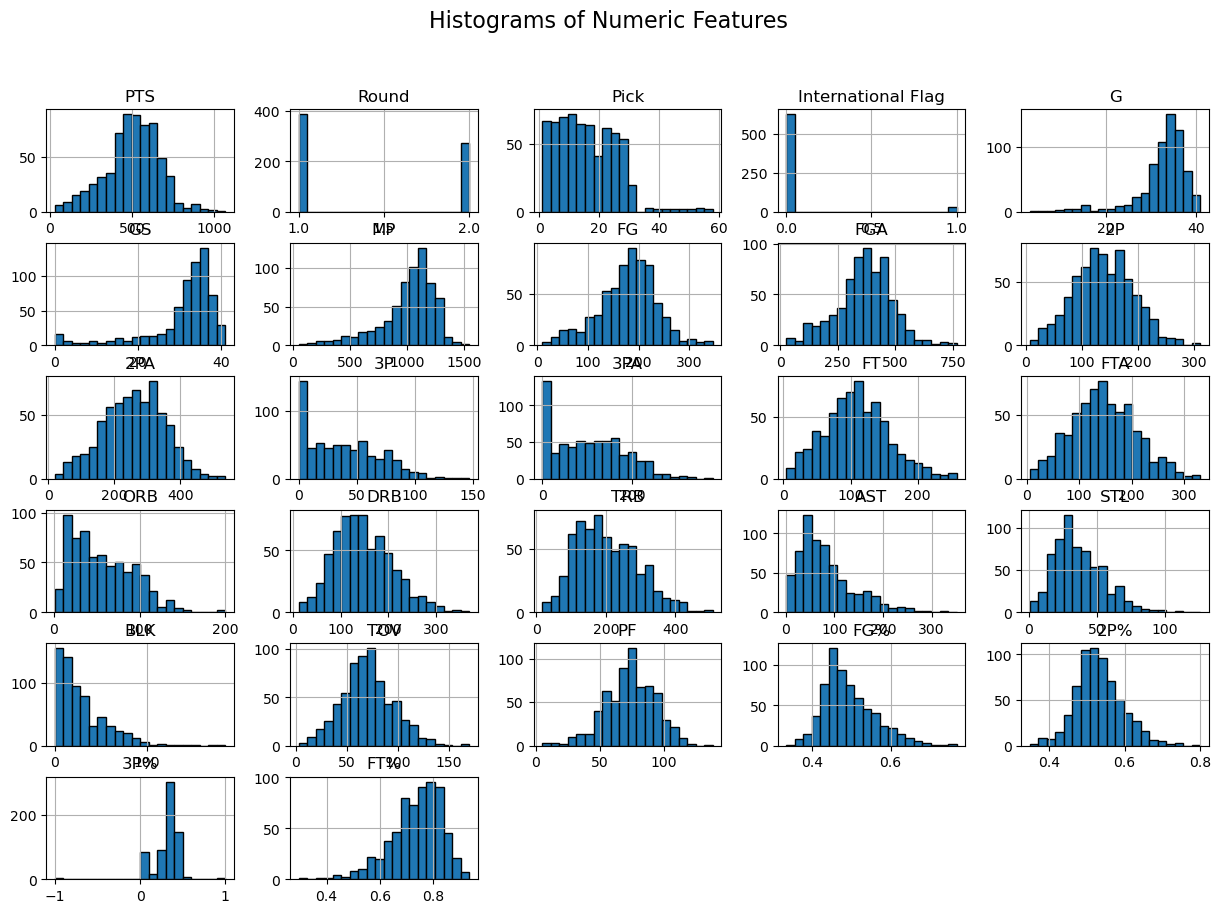

In [11]:
#Examine basic statistical info of numeric features
print("Statistical Summary of Features:")
display(X.describe())

#Identify numeric columns
numeric_cols = X.select_dtypes(include=[np.number]).columns

X[numeric_cols].hist(figsize=(15,10), bins=20, edgecolor='black')
plt.suptitle("Histograms of Numeric Features", fontsize=16)
plt.show()

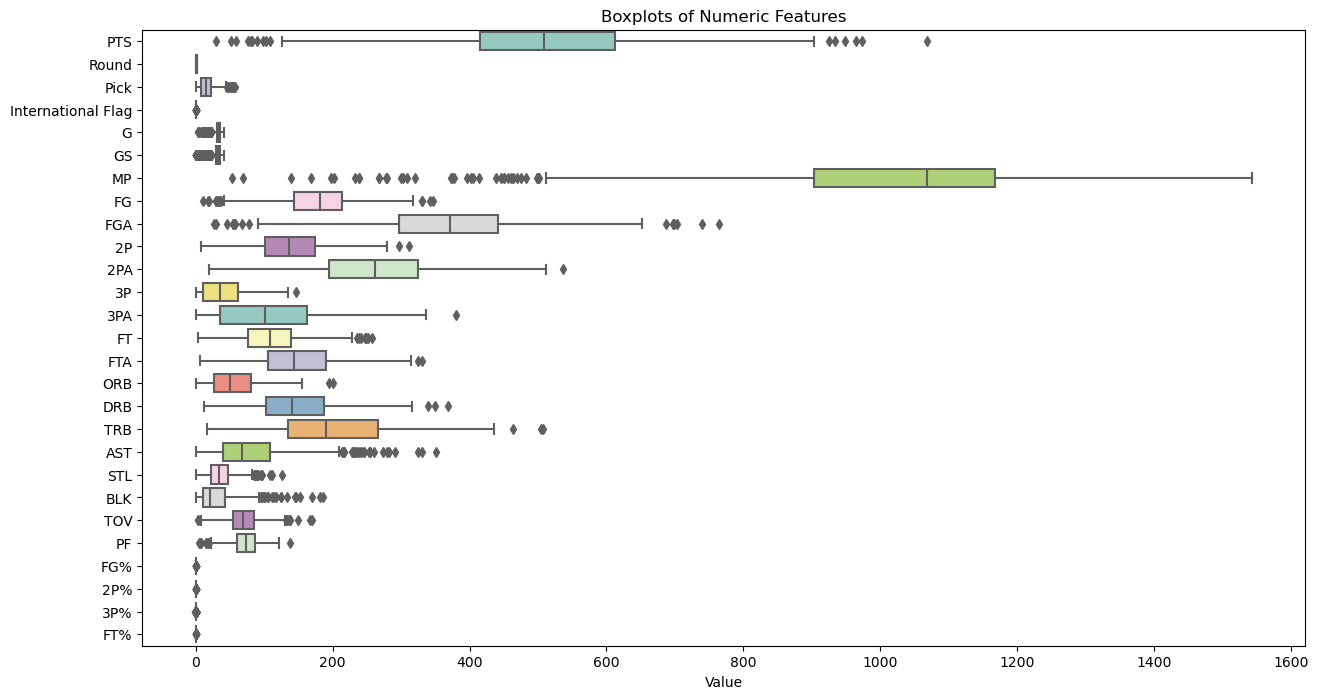

In [12]:
#Boxplots of numeric features to identify outliers
plt.figure(figsize=(15,8))
sns.boxplot(data=X[numeric_cols], orient='h', palette='Set3')
plt.title("Boxplots of Numeric Features")
plt.xlabel("Value")
plt.show()

Correlation of features with Win Share:
ORB     0.239950
TRB     0.198404
FG%     0.191722
2P      0.181480
2P%     0.181421
BLK     0.169667
FTA     0.168665
DRB     0.151856
FT      0.141472
2PA     0.134416
GS      0.112347
PF      0.112221
STL     0.111090
FG      0.110688
G       0.104196
PTS     0.097486
MP      0.066082
TOV     0.048947
FGA     0.033979
AST    -0.008936
FT%    -0.053985
3P%    -0.079060
3P     -0.104081
3PA    -0.105659
Pick   -0.267934
dtype: float64


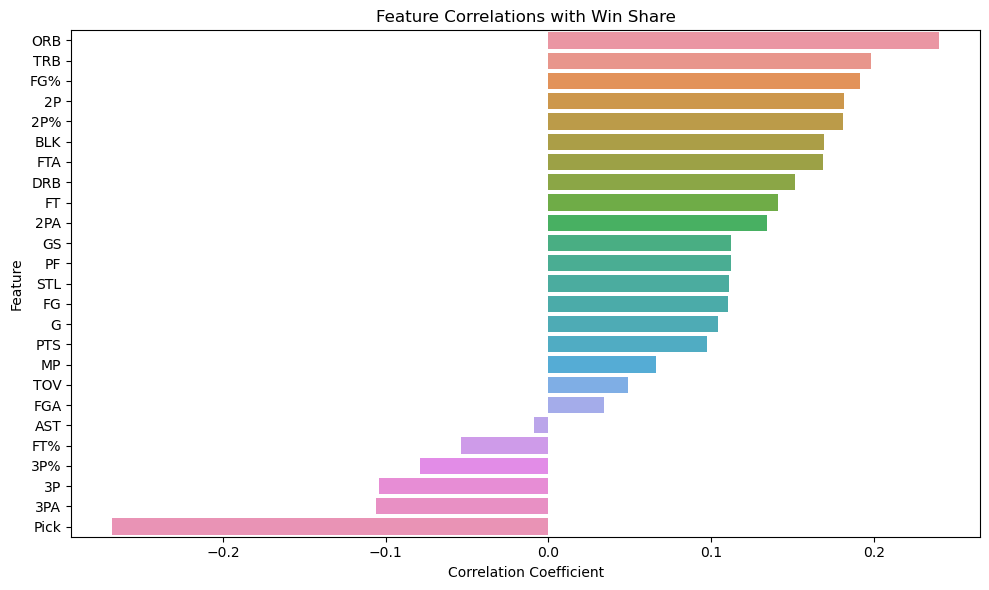

In [13]:
# Feature correlations
X_numeric = X.select_dtypes(include=[np.number])

# Exclude columns that are likely categorical 
X_numeric = X_numeric.loc[:, X_numeric.nunique() > 2]

# Compute the correlation of each numeric feature with Win Share
feature_correlations = X_numeric.corrwith(y).sort_values(ascending=False)

print("Correlation of features with Win Share:")
print(feature_correlations)

plt.figure(figsize=(10, 6))
sns.barplot(x=feature_correlations.values, y=feature_correlations.index, orient='h')
plt.title("Feature Correlations with Win Share")
plt.xlabel("Correlation Coefficient")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()
